Part 2
---

In [3]:
import json
import matplotlib.pyplot as plt
import datetime, time
import pytz
import pandas as pd

In [4]:
hashtag = '#SuperBowl'
hashtag_dict = {'#GoHawks' : 'tweets_#gohawks.txt',
                '#GoPatriots' : 'tweets_#gopatriots.txt',
                '#NFL' : 'tweets_#nfl.txt',
                '#Patriots' : 'tweets_#patriots.txt',
                '#SB49' : 'tweets_#sb49.txt',
                '#SuperBowl' : 'tweets_#superbowl.txt'}

input_file = open('../tweet_data/' + hashtag_dict[hashtag], encoding="utf8")
pst_tz = pytz.timezone('US/Pacific')

total_list = []
i = 0
for line in input_file:
    curr_list = []
    curr_data = json.loads(line)
        
    location = curr_data['tweet']['user']['location']
    text = curr_data['highlight']
    
    
    curr_list.append(text)
    curr_list.append(location)
   
    total_list.append(curr_list)  
    i += 1
    

In [5]:
Data = pd.DataFrame(total_list,columns=['text','location'])
Data = Data.reset_index(drop=True)
print(Data[:]['location'])

0                    #Seahawks #Mariners 
1                                        
2                              k-town Ak.
3                                  Brazil
4                                    Iowa
5               http://ask.fm/lKatzPerryl
6                                 Cloud 9
7                           LATINOAMÉRICA
8           Westcoast right near da beach
9                              Boston, MA
10         Gran Canaria Madrid Londres LA
11                     Phoenix Valleywide
12                                       
13                                Seattle
14                                the USA
15                       Bogota, Colombia
16                       Victor, New York
17                     Tampa Bay, Florida
18                            Memphis, TN
19                             London, UK
20                                 Canada
21                              Worldwide
22                         Huntsville, AL
23                                

In [48]:
#sort location

import re

text_w = []
location_w = []
text_m = []
location_m = []

list_w = ['Washington', 'WA', 'washington', 'WASHINGTON']
list_m = ['Massachusetts', 'massachusetts', 'MA', 'MASSACHUSETTS' ]
list_dc = ['DC', 'D.C.', 'dc', 'd.c.']

i = 0
j = 0
for index, row in Data.iterrows():
    list_row1 = re.split('; |, ',row[1])
    if any(x in list_row1 for x in list_w) and not any(y in list_row1 for y in list_dc):
        text = row[0].split('http')
        temp = re.sub('\s#', ' ', text[0], flags=re.IGNORECASE)
        text_w.append(temp)
        location_w.append(0)
        i += 1
    elif any(x in list_row1 for x in list_m):
        text = row[0].split('http')
        temp = re.sub('\s#', ' ', text[0], flags=re.IGNORECASE)
        text_m.append(temp)
        location_m.append(1)
        j += 1
        

print(i)
print(j)

11586
12910


SVM
---

In [62]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import NMF
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

stop_words = text.ENGLISH_STOP_WORDS
text_clf = Pipeline([('vect', CountVectorizer(analyzer = 'word', stop_words=stop_words, lowercase=True)),
                         ('tfidf', TfidfTransformer()),
                         ('trunc', TruncatedSVD(n_components=3,random_state=0)),
                         ('clf', SVC(probability=True, C = 1000, random_state=42))])

def plot(test_target, predicted):
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = metrics.roc_curve(test_target, predicted)
    roc_auc = metrics.auc(fpr, tpr)
    

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def performance(clf):
    scoring = ['accuracy', 'precision_macro', 'recall_macro']
    scores = cross_validate(clf, text_w + text_m, location_w + location_m, scoring=scoring, cv=5, return_train_score=False)
    mean = scores['test_accuracy'].mean()
    recall = scores['test_recall_macro'].mean()
    precision = scores['test_precision_macro'].mean()


    print('accuracy:%s'%mean)
    print('recall:%s'%recall)
    print('precision:%s'%precision)
    predicted = cross_val_predict(clf, text_w + text_m, location_w + location_m, cv=5)
    plot(location_w + location_m, predicted)
    confusion_matrix = metrics.confusion_matrix(location_w + location_m, predicted)
    print('confusion matrix:/n %s'%confusion_matrix)



accuracy:0.759587462664
recall:0.748326648751
precision:0.810059970222


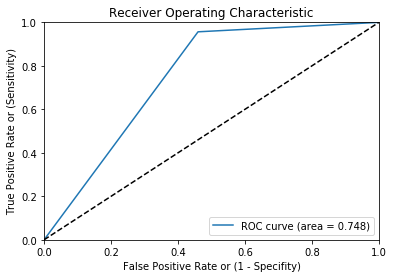

confusion matrix:/n [[ 6258  5328]
 [  561 12349]]


In [63]:
performance(text_clf)

Logistical Regression
---

accuracy:0.760771785995
recall:0.750449909782
precision:0.805701840284


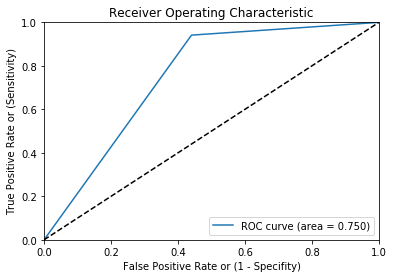

confusion matrix:/n [[ 6484  5102]
 [  758 12152]]


In [68]:
from sklearn.linear_model import LogisticRegression
log_clf = Pipeline([('vect', CountVectorizer(analyzer = 'word', stop_words=stop_words, lowercase=True)),
                         ('tfidf', TfidfTransformer()),
                         ('trunc', TruncatedSVD(n_components=3,random_state=0)),
                         ('clf', LogisticRegression(random_state=42))])
performance(log_clf)

GaussionNB
---

accuracy:0.728684137954
recall:0.717741092794
precision:0.768110643738


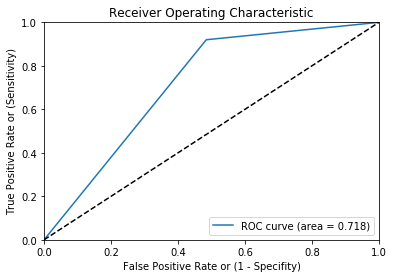

confusion matrix:/n [[ 5972  5614]
 [ 1032 11878]]


In [73]:
from sklearn.naive_bayes import GaussianNB
bayes_clf = Pipeline([('vect', CountVectorizer(analyzer = 'word', stop_words=stop_words, lowercase=True)),
                         ('tfidf', TfidfTransformer()),
                         ('trunc', TruncatedSVD(n_components=3,random_state=0)),
                         ('clf', GaussianNB())])
performance(bayes_clf)